In [3]:
import pandas as pd
import numpy as np
from time import time
from IPython.display import display
import os

import matplotlib.pyplot as plt
import seaborn as sns

import vpython as vs

%matplotlib inline


<IPython.core.display.Javascript object>

# PACKAGE DESCRIPTION

numpy -> is a package in python that is used for scientific computing. It supports higher-order mathematical functions, higher dimensional arrays, matrices and other data structures.
pandas-> is a very popular library that is used for a lot of data analysis and statistics related problems.
time -> standard module in python that allows for time related functions
display -> is a module in the IPython toolkit that helps you display data structures in a nice, readable format.
matplotlib -> is a very popular visualization library that lets you create a wide array of figures, charts and graphs in the IPython Notebook
seaborn -> is another visualization tool that uses matplotlib underneath, and provides you with easy-to-use APIs for visualization. It also makes your graphs more prettier!

## Basic analysis

In [4]:
# We have 2 csv files we're combining them:
#read the path
file_path = r"C:\Users\nakul\OneDrive\Desktop\Projects\Study_on_wine"
#list all the files from the directory
# created a object file_list to print both csv files
file_list = os.listdir(file_path)
file_list

# Creating a new empty dataframe known as df_a 
df_a = pd.DataFrame()

#Appending

for file in file_list:
    # ERROR OCCURED SAYING IT CAN'T FIND ONE OF THE FILE INSIDE THE PATH, SO USED FILE_PATH + '\\' + FILE TO SOLVE
    df_temp = pd.read_csv(file_path + '\\' + file)
    df_a = df_a.append(df_temp, ignore_index = True)
df_a.head()

C:\Users\nakul\AppData\Local\Temp\ipykernel_10436\335887053.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_a = df_a.append(df_temp, ignore_index = True)
C:\Users\nakul\AppData\Local\Temp\ipykernel_10436\335887053.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_a = df_a.append(df_temp, ignore_index = True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
#CHECKING FOR NULL VALUES

df_a.isnull().any()

# information of the data base
df_a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 609.2 KB


In [9]:
#Basic analysis
#number of wines(Shape returns a tuple with each index having the number of corresponding elements) 
n_wines = df_a.shape[0]

# Using loc to identify the location of rows with quality more than 6
quality_above_6 = df_a.loc[(df_a['quality']>6)]
#Number of wines with quality rating over 6
n_quality_above_6 = quality_above_6.shape[0]

# checking for wines below quality 5
quality_below_5 = df_a.loc[(df_a['quality'] <5 )]
n_quality_below_5 = quality_below_5.shape[0]


#Checking for quality between
quality_between_5_6 = df_a.loc[(df_a['quality'] >= 5) & (df_a['quality'] <= 6)]
n_quality_between_5_6 = quality_between_5_6.shape[0]


# Finding percentage of wines which has above 6 quality
greater_percent = (n_quality_above_6/n_wines)*100

#Printing

print("Total number of wines : {}".format(n_wines))
print("Number of wines with rating of 7 and above : {}".format(n_quality_above_6))
print("Number of wines with rating of 4 and below : {}".format(n_quality_below_5))
print("Number of wines with rating between 5 & 6 : {}".format(n_quality_between_5_6))
print("Percentage of Wine with rating 7 and above : {}".format(round(greater_percent,2)))

Total number of wines : 6497
Number of wines with rating of 7 and above : 1277
Number of wines with rating of 4 and below : 246
Number of wines with rating between 5 & 6 : 4974
Percentage of Wine with rating 7 and above : 19.66


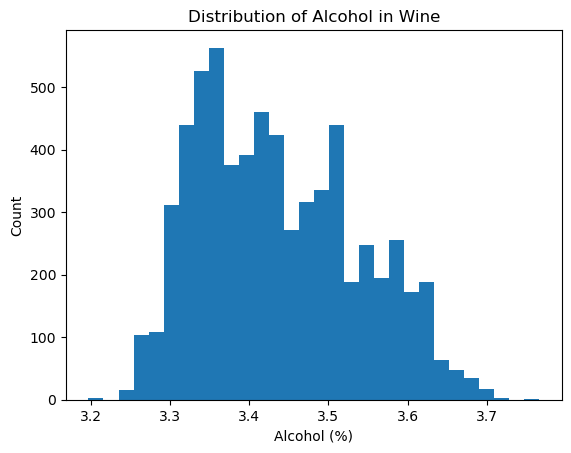

In [54]:
#visualising alcohol vs number
#playing with histogram
plt.hist(df_a['alcohol'], bins=30)
plt.xlabel('Alcohol (%)')
plt.ylabel('Count')
plt.title('Distribution of Alcohol in Wine')
plt.show()

C:\Users\nakul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='alcohol'>

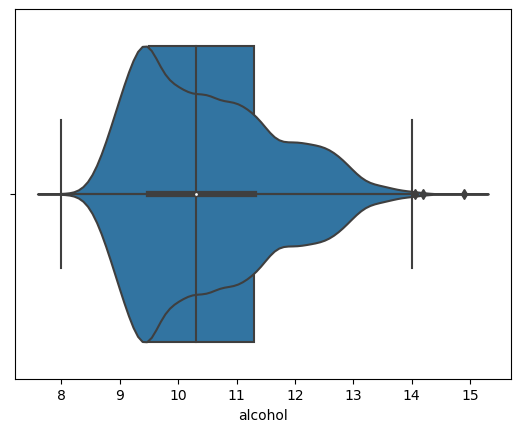

In [50]:
sns.boxplot(df_a['alcohol'])
sns.violinplot(df_a['alcohol'])

In [60]:
#Changing the scale into log 1
df_transformed = df_a.copy()
df_transformed['alcohol'] = np.log1p(df_transformed['alcohol'])

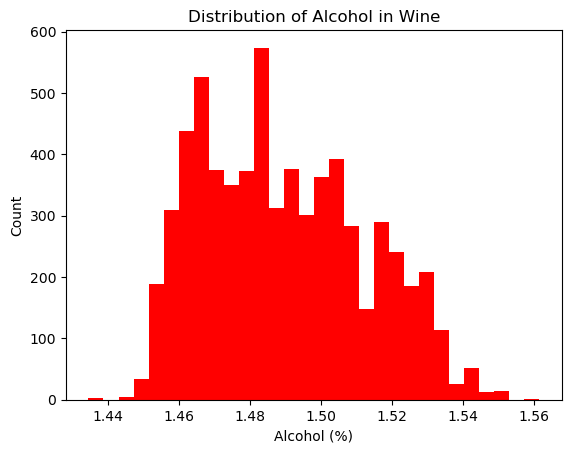

In [66]:
plt.hist(df_transformed['alcohol'], bins=30, color='red')
plt.xlabel('Alcohol (%)')
plt.ylabel('Count')
plt.title('Distribution of Alcohol in Wine')
plt.show()

In [65]:
#comparing skew
#This will give you the skewness score, positive score means right skewed and negative score means left skewed.
df_a['alcohol'].skew()
df_transformed['alcohol'].skew()

0.3604418665518616

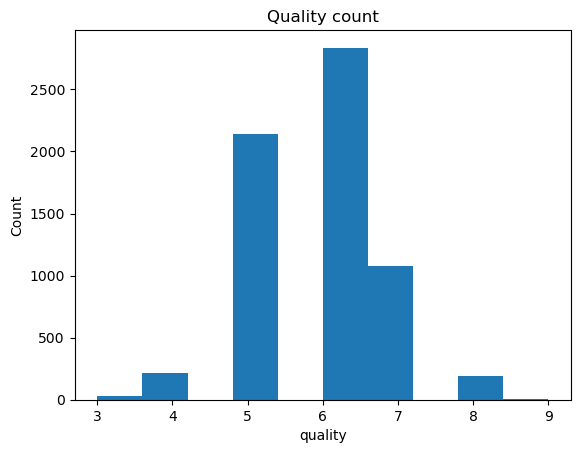

In [11]:
# Visualising quality vs number

plt.hist(df_a['quality'])
plt.xlabel('quality')
plt.ylabel('Count')
plt.title('Quality count')
plt.show()

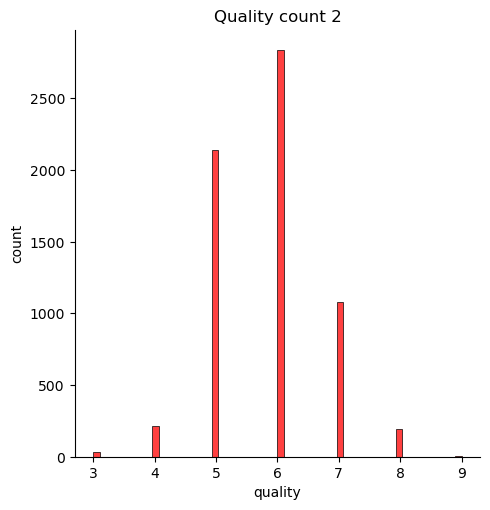

In [15]:
sns.displot(df_a['quality'], color = 'red')
plt.xlabel('quality')
plt.ylabel('count')
plt.title('Quality count 2')
plt.show()

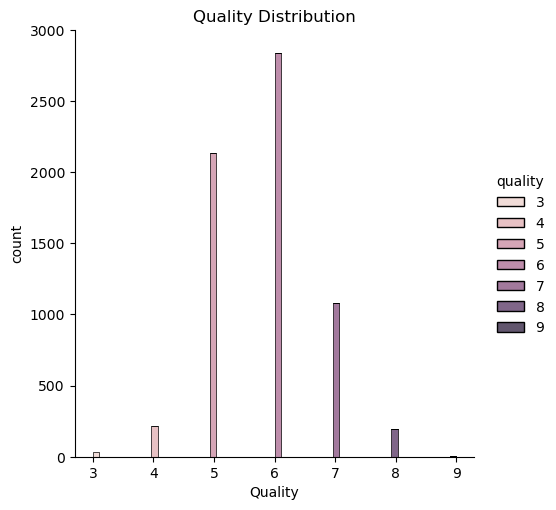

In [29]:
# beautify visualization`
sns.displot(df_a, x='quality', hue='quality',hue_order=['red','green','blue','yellow'], multiple='stack', kde=False)
sns.set_palette("husl") #HUSL IS USED IN SEABORN FOR A COLOR PALETTE
plt.xlabel('Quality')
plt.ylabel('count')
plt.ylim(ymin=0, ymax=3000) # this line sets the y-axis limit
plt.title('Quality Distribution')
plt.show()

## Mean, Mode , Median : 

In [21]:
# Additional data analysis (Mean, median, mode)

display(np.round(df_a.describe()))

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0,6497.0
mean,7.0,0.0,0.0,5.0,0.0,31.0,116.0,1.0,3.0,1.0,10.0,6.0
std,1.0,0.0,0.0,5.0,0.0,18.0,57.0,0.0,0.0,0.0,1.0,1.0
min,4.0,0.0,0.0,1.0,0.0,1.0,6.0,1.0,3.0,0.0,8.0,3.0
25%,6.0,0.0,0.0,2.0,0.0,17.0,77.0,1.0,3.0,0.0,10.0,5.0
50%,7.0,0.0,0.0,3.0,0.0,29.0,118.0,1.0,3.0,1.0,10.0,6.0
75%,8.0,0.0,0.0,8.0,0.0,41.0,156.0,1.0,3.0,1.0,11.0,6.0
max,16.0,2.0,2.0,66.0,1.0,289.0,440.0,1.0,4.0,2.0,15.0,9.0


## Correlation :


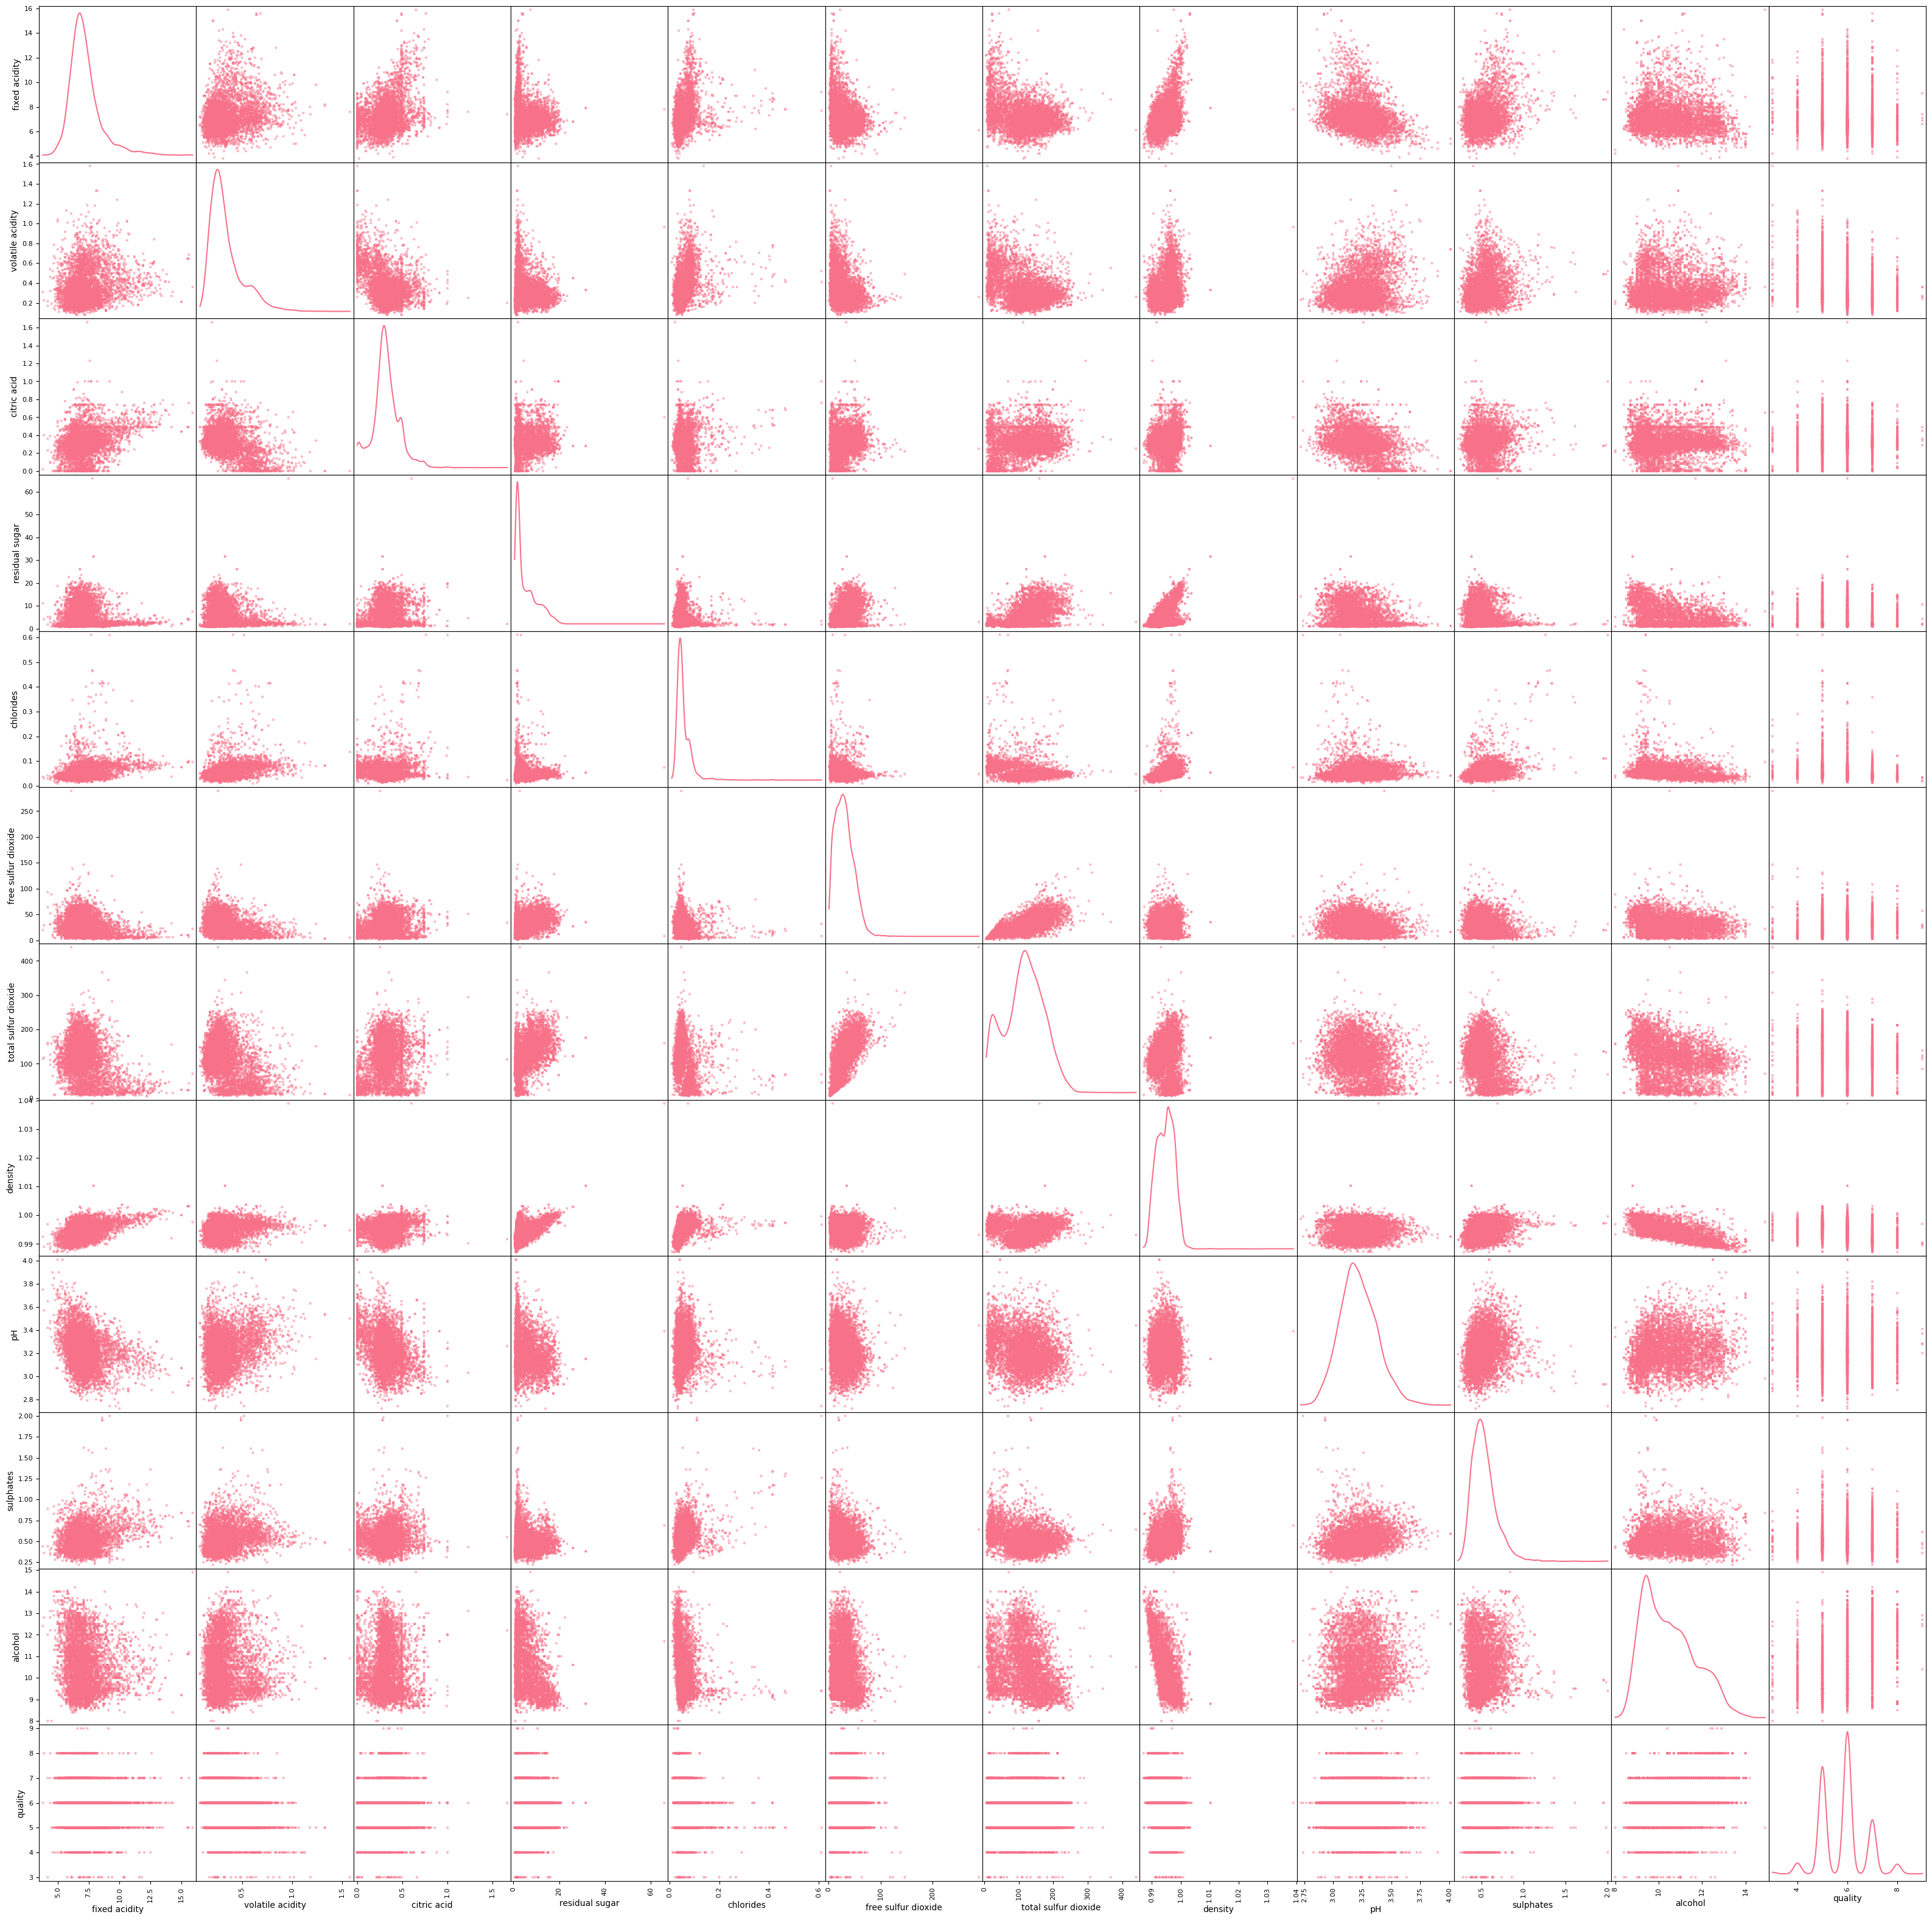

In [34]:
#Checking scatter plot of the whole database
pd.plotting.scatter_matrix(df_a, alpha = 0.5, figsize = (40,40), diagonal = 'kde');


pd.plotting.scatter_matrix is a function in the Pandas library in Python that generates a scatter matrix plot of the columns in a DataFrame.
The alpha parameter controls the transparency of the scatter points
The figsize parameter controls the size of the figure, in inches. The tuple (40, 40) passed as the value will make the figure 40 inches wide and 40 inches tall.
Using Diagonalu argument we can change bars into lines

In [35]:
#CHECKING FOR CORRELATION THROUGH TABLE
df_a.corr()
# There appears to be relation between some off the elements
#time to create a heatmap

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485


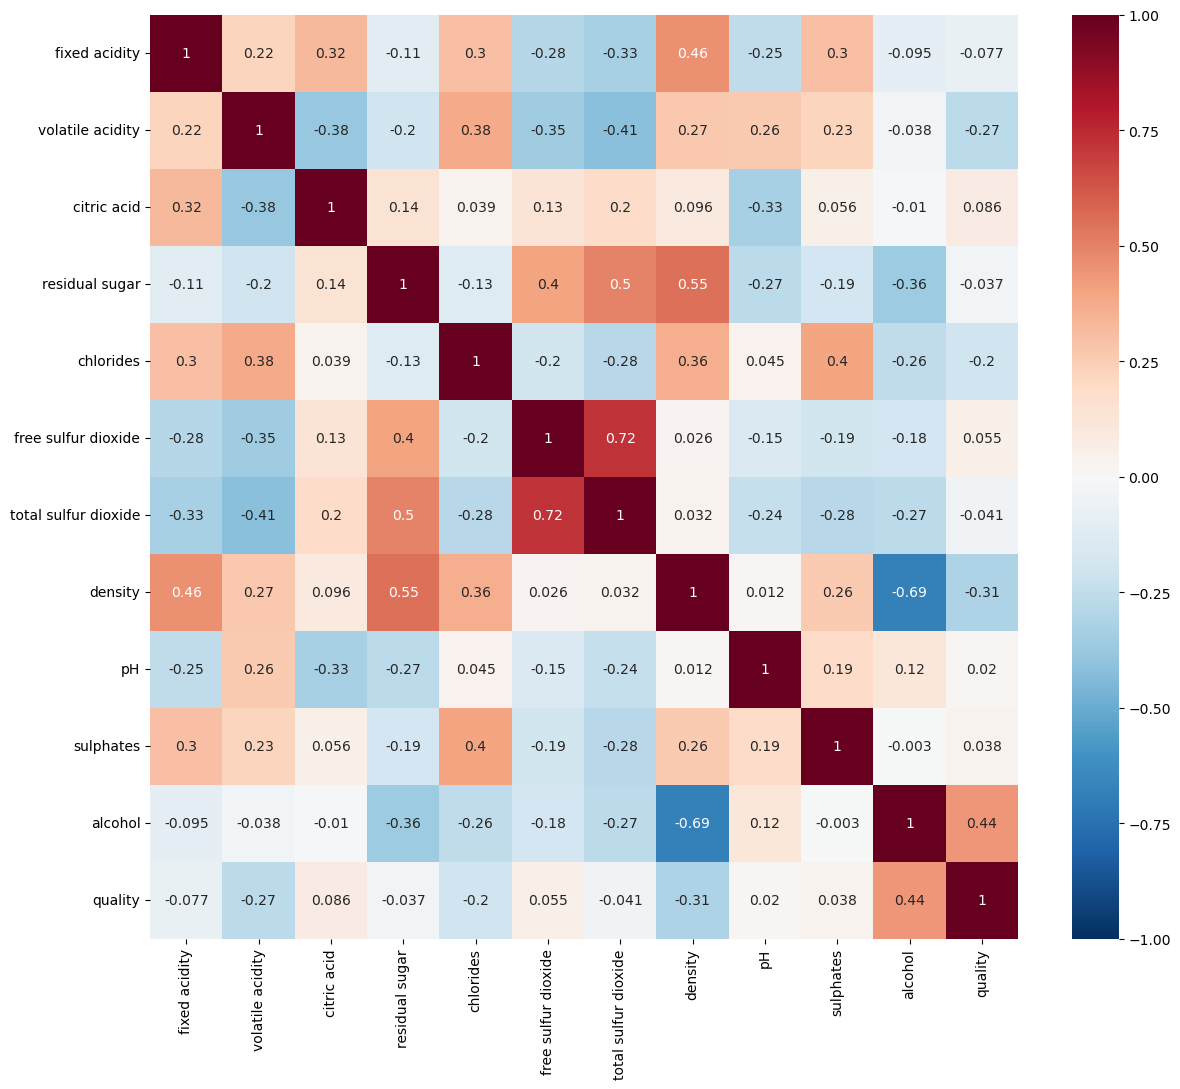

In [44]:
correlation = df_a.corr()
#display
plt.figure(figsize = (14,12)) # creating a figure with w = 14 and h = 12 from plot
heatmap = sns.heatmap(correlation, annot= True, linewidth = 0, vmin = -1, cmap= "RdBu_r") #heatmap is a function


 'annot' is set to True, which means that the values of the correlation matrix will be annotated onto the heatmap.
 The 'linewidth' parameter is set to 0, which means that the lines separating the cells in the heatmap will have a width of 0
 The vmin parameter is set to -1, which sets the minimum value for the colormap to -1.
 If you initialize vmin = 1, it means that any value in the correlation matrix less or equal to 1 will be colored with the
 same color from the colormap. If the highest correlation value is less than 1, this will change the heatmap visual 
 representation since the color of the cells would be affected

 IN SIMPLE terms VMIN SETS THE MINIMUM VALUE

As you can see, the squares with positive values show direct co-relationships between features. The higher the values, the stronger these relationships are — they’ll be more reddish. That means, if one feature increases, the other one also tends to increase, and vice-versa.

The squares that have negative values show an inverse co-relationship. The more negative these values get, the more inversely proportional they are, and they’ll be more blue. This means that if the value of one feature is higher, the value of the other one gets lower.

Finally, squares close to zero indicate almost no co-dependency between those sets of features.

# pH vs Fixed Acidity

C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


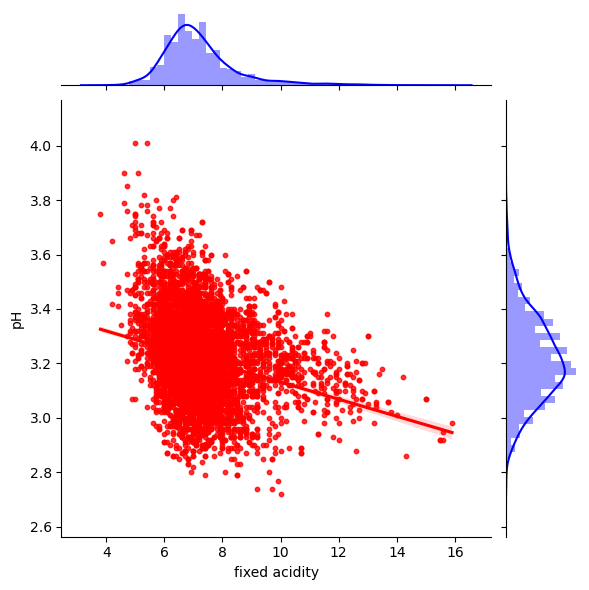

In [69]:
# Creating a data frame which includes values of both pH and Fixed acidity columns into fixed_ph
fixed_pH = df_a[['fixed acidity', 'pH']]
# this allows you to select multiple columns that you wish to analyze together,
# instead of having to analyze them one at a time, which can be more convenient in some cases.

#Joint grid creation
gridA = sns.JointGrid(x="fixed acidity", y="pH", data=fixed_pH, height=6) # just for labels (no data inside)
#Uses joint grid, x axis is set as fixed activity and y axis is set as pH taken from the newly created datframe, with size included

#Drawing a regression plot in the grid
gridA = gridA.plot_joint(sns.regplot, scatter_kws = {"s" : 10}, color = 'red')
plt.grid()
# The gridA.plot_joint method is used to add a scatter plot to the JointGrid object that was created previously.
# sns.regplot is being passed as the first argument, which means that the scatter plot will be a regression plot,
# scatter_kws is used for passing additional arguments
# "s"  argument is being passed with the value of 10, which controls the size of the dots in the scatter plot

#Draws a distribution plot in the same grid
gridA = gridA.plot_marginals(sns.distplot, color = 'blue')
plt.grid()

### CONCLUSION :
                This scatterplot shows that as Fixed acidity increases the lower the pH, 
                In other words a lower pH level is, after all, an indicator of high acidity.

## Fixed Acidity vs Citric Acid :

C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


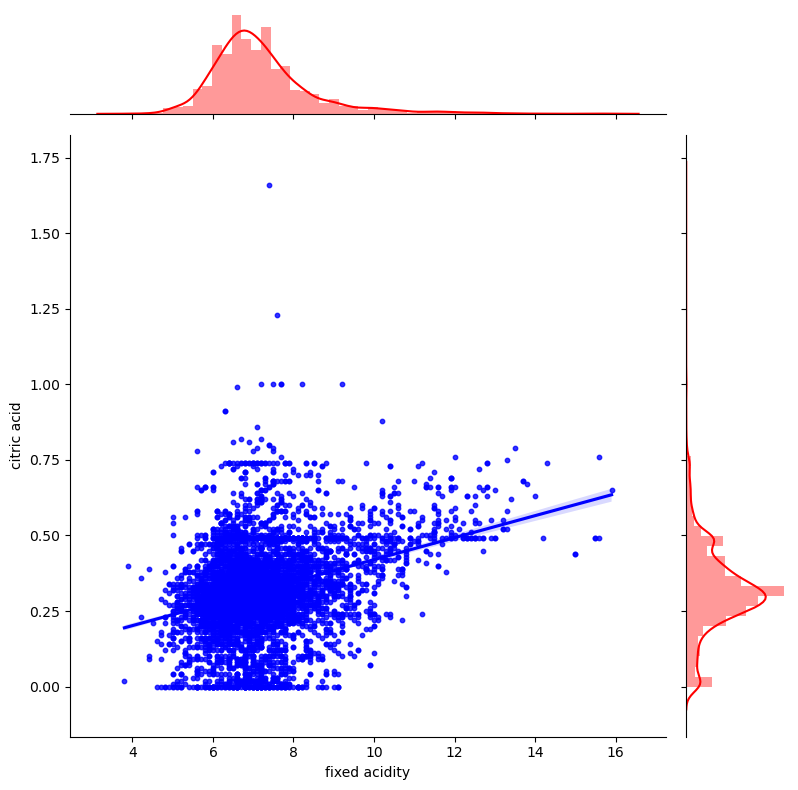

In [82]:
# Implementing wanted columns into an object
Fixed_Acid_Citric_Acid = df_a[['fixed acidity', 'citric acid']]

gridA2 = sns.JointGrid(x = "fixed acidity", y = "citric acid", data = Fixed_Acid_Citric_Acid, height = 8)

gridA2 = gridA2.plot_joint(sns.regplot, scatter_kws = {"s" : 10}, color = 'blue')

gridA2 = gridA2.plot_marginals(sns.distplot, color = 'red')

### conclusion : 
                As the amount of citric acids increase, so do the fixed acidity levels.

## Volatile acidity vs Quality

C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


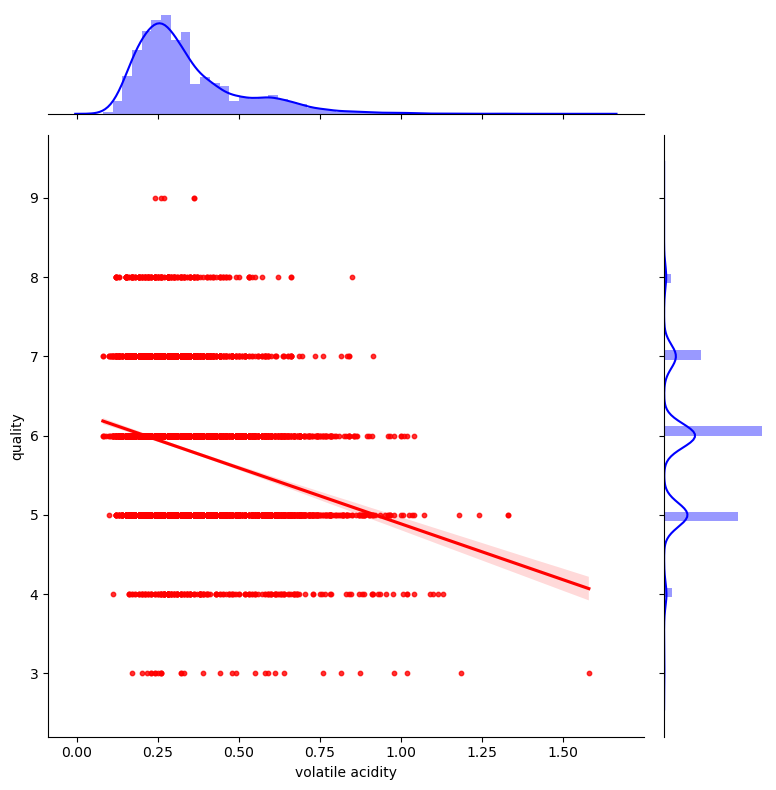

In [89]:
volatile_quality = df_a[['volatile acidity', 'quality']]

gridA3 = sns.JointGrid(x='volatile acidity' , y = 'quality' , data = volatile_quality, height = 8)

gridA3 = gridA3.plot_joint(sns.regplot, scatter_kws = {"s" : 10}, color = 'red')

gridA3 = gridA3.plot_marginals(sns.distplot, color = 'blue')

### Conclusion : 
                we can say that lesser the volatile acidity higher the quality

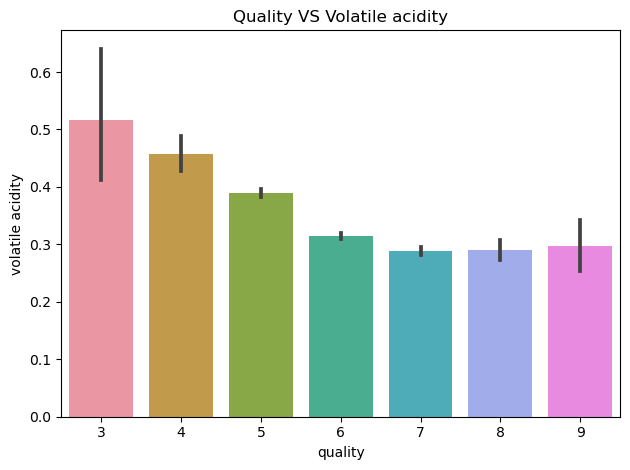

<Figure size 640x480 with 0 Axes>

In [93]:
sns.barplot(x='quality', y='volatile acidity', data=volatile_quality)
plt.title('Quality VS Volatile acidity')

plt.tight_layout() # to avoid overlapping of title, x axis, y axis
plt.show()
plt.gcf().clear() # o make sure the kernel is cleaned and ready to plot again.

## Alcohol vs Quality

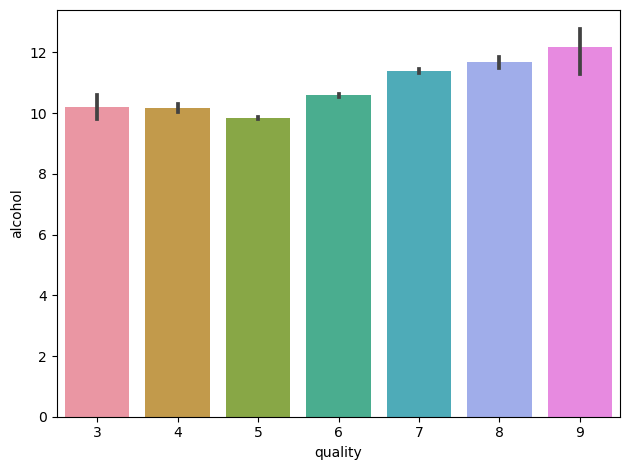

<Figure size 640x480 with 0 Axes>

In [110]:
alcohol_quality = df_a[['alcohol' , 'quality']]

sns.barplot(x = 'quality', y = 'alcohol', data = alcohol_quality)

plt.tight_layout()
plt.show()
plt.gcf().clear()

## Density vs Residual Sugar

C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


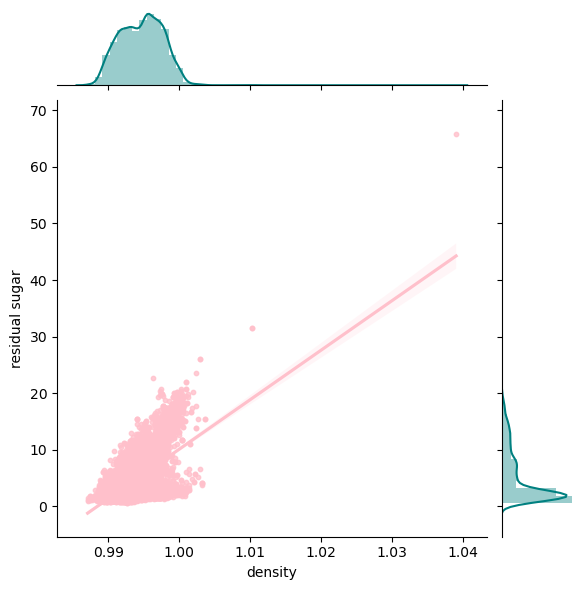

In [115]:
density_sugar = df_a[['density' , 'residual sugar']]

grid4 = sns.JointGrid(x = 'density' , y = 'residual sugar', data = density_sugar)

grid4 = grid4.plot_joint(sns.regplot , scatter_kws = {"s" : 10}, color = 'pink')

grid4 = grid4.plot_marginals(sns.distplot, color = 'teal')

## Conclusion :
                This scatter plot shows us that higher the density the higher the residual sugar

## Density vs Alcohol

C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\nakul\anaconda3\lib\site-packages\seaborn\distributions.py:1689: FutureWarning: The `vertical` parameter is deprecated and will be removed in a future version. Assign the data to the `y` variable instead.
  warnings.warn(msg, FutureWarning)


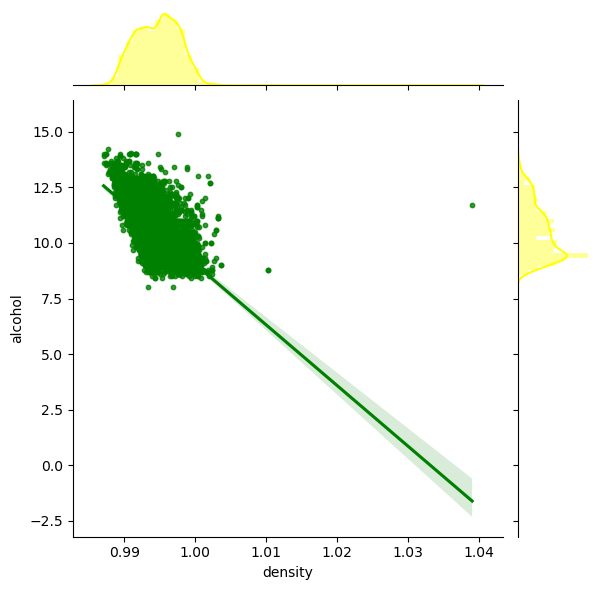

In [125]:
density_alcohol = df_a[['density' , 'alcohol']]

grid5 = sns.JointGrid(x= 'density' , y = 'alcohol', data = density_alcohol)

grid5 = grid5.plot_joint(sns.regplot, scatter_kws = {"s" : 10}, color = 'green')

grid5 = grid5.plot_marginals(sns.distplot, color = 'yellow')

## Conclusion : 
                Higher the alcohol lower the density

# CHECKING FOR OUTLIERS

In [12]:
# For each feature find the df_a points with extreme high or low values
for feature in df_a.keys():
    # Calculate Q1 (25th percentile of the df_a) for the given feature
    Q1 = np.percentile(df_a[feature], q=25)
    
    #  Calculate Q3 (75th percentile of the df_a) for the given feature
    Q3 = np.percentile(df_a[feature], q=75)
    
    #  Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    interquartile_range = Q3 - Q1
    step = 1.5 * interquartile_range
    
    # Display the outliers
    
    display(df_a[~((df_a[feature] >= Q1 - step) & (df_a[feature] <= Q3 + step))].head(5))

    # Remove the outliers, if any were specified
    good_df_a = df_a.drop(df_a.index[outliers]).reset_index(drop = True)
    

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
56,10.2,0.42,0.57,3.4,0.070,4.0,10.0,0.9971,3.04,0.63,9.6,5
74,9.7,0.32,0.54,2.5,0.094,28.0,83.0,0.9984,3.28,0.82,9.6,5
113,10.1,0.31,0.44,2.3,0.080,22.0,46.0,0.9988,3.32,0.67,9.7,6
197,11.5,0.30,0.60,2.0,0.067,12.0,27.0,0.9981,3.11,0.97,10.1,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
4,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.0,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
7,7.3,0.65,0.0,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1599,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1606,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1613,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.0002,2.98,0.67,9.7,5
1637,7.3,0.24,0.39,17.95,0.057,45.0,149.0,0.9999,3.21,0.36,8.6,5
1638,7.3,0.24,0.39,17.95,0.057,45.0,149.0,0.9999,3.21,0.36,8.6,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,5
15,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.9986,3.17,0.93,9.2,5
17,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1666,6.7,0.25,0.13,1.2,0.041,81.0,174.0,0.9920,3.14,0.42,9.8,5
1896,7.2,0.19,0.46,3.8,0.041,82.0,187.0,0.9932,3.19,0.60,11.2,7
1924,7.5,0.27,0.31,5.8,0.057,131.0,313.0,0.9946,3.18,0.59,10.5,5
1986,6.3,0.39,0.35,5.9,0.040,82.5,260.0,0.9941,3.12,0.66,10.1,5
1994,6.8,0.27,0.12,1.3,0.040,87.0,168.0,0.9920,3.18,0.41,10.0,5


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1079,7.9,0.30,0.68,8.30,0.050,37.5,278.0,0.99316,3.01,0.51,12.3,7
1081,7.9,0.30,0.68,8.30,0.050,37.5,289.0,0.99316,3.01,0.51,12.3,7
1924,7.5,0.27,0.31,5.80,0.057,131.0,313.0,0.99460,3.18,0.59,10.5,5
3016,8.6,0.55,0.35,15.55,0.057,35.5,366.5,1.00010,3.04,0.63,11.0,3
3530,7.1,0.49,0.22,2.00,0.047,146.5,307.5,0.99240,3.24,0.37,11.0,3


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
3252,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
3262,7.9,0.330,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6
4380,7.8,0.965,0.60,65.8,0.074,8.0,160.0,1.03898,3.39,0.69,11.7,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
45,4.6,0.52,0.15,2.1,0.054,8.0,65.0,0.9934,3.90,0.56,13.1,4
94,5.0,1.02,0.04,1.4,0.045,41.0,85.0,0.9938,3.75,0.48,10.5,4
95,4.7,0.60,0.17,2.3,0.058,17.0,106.0,0.9932,3.85,0.60,12.9,6
142,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.9916,3.68,0.79,14.0,6
144,5.2,0.34,0.00,1.8,0.050,27.0,63.0,0.9916,3.68,0.79,14.0,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
13,7.8,0.61,0.29,1.6,0.114,9.0,29.0,0.9974,3.26,1.56,9.1,5
14,8.9,0.62,0.18,3.8,0.176,52.0,145.0,0.9986,3.16,0.88,9.2,5
15,8.9,0.62,0.19,3.9,0.170,51.0,148.0,0.9986,3.17,0.93,9.2,5
17,8.1,0.56,0.28,1.7,0.368,16.0,56.0,0.9968,3.11,1.28,9.3,5
19,7.9,0.32,0.51,1.8,0.341,17.0,56.0,0.9969,3.04,1.08,9.2,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,15.9,0.36,0.65,7.5,0.096,22.0,71.0,0.99760,2.98,0.84,14.90,5
5517,6.4,0.35,0.28,1.6,0.037,31.0,113.0,0.98779,3.12,0.40,14.20,7
6102,5.8,0.61,0.01,8.4,0.041,31.0,104.0,0.99090,3.26,0.72,14.05,7


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
267,7.9,0.35,0.46,3.6,0.078,15.0,37.0,0.9973,3.35,0.86,12.8,8
278,10.3,0.32,0.45,6.4,0.073,5.0,13.0,0.9976,3.23,0.82,12.6,8
390,5.6,0.85,0.05,1.4,0.045,12.0,88.0,0.9924,3.56,0.82,12.9,8
440,12.6,0.31,0.72,2.2,0.072,6.0,29.0,0.9987,2.88,0.82,9.8,8
455,11.3,0.62,0.67,5.2,0.086,6.0,19.0,0.9988,3.22,0.69,13.4,8
